In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from parameter import *

In [78]:
ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  10 of 10 completed


,AMZN,BAC,COST,DIS,DPZ,KO,MCD,MSFT,NAT,SBUX
Date,,,,,,,,,,
2023-03-27,98.040001,28.490000,493.220001,95.620003,322.220001,61.349998,273.839996,276.380005,4.00,98.660004
2023-03-28,97.239998,28.120001,486.769989,94.820000,324.230011,61.419998,275.850006,275.230011,3.90,98.720001
2023-03-29,100.250000,28.670000,490.869995,96.870003,327.579987,61.860001,277.440002,280.510010,3.97,100.620003
2023-03-30,102.000000,28.299999,491.480011,98.099998,327.649994,61.849998,277.790009,284.049988,3.94,101.320000
2023-03-31,103.290001,28.600000,496.869995,100.129997,329.869995,62.029999,279.609985,288.299988,3.96,104.129997


In [79]:
market_prices = yf.download("SPY", period="max")["Adj Close"]
market_prices.head()

[*********************100%***********************]  1 of 1 completed


Date
1993-01-29    25.122335
1993-02-01    25.301029
1993-02-02    25.354624
1993-02-03    25.622650
1993-02-04    25.729841
Name: Adj Close, dtype: float64

In [80]:
mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'MSFT': 2146047492096,
 'AMZN': 1058443624448,
 'NAT': 826832192,
 'BAC': 228779409408,
 'DPZ': 11683467264,
 'DIS': 182918479872,
 'KO': 268360990720,
 'MCD': 204533874688,
 'COST': 220353396736,
 'SBUX': 122995236864}

In [81]:
import pypfopt
pypfopt.__version__

'1.5.4'

In [82]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

2.52988805675931

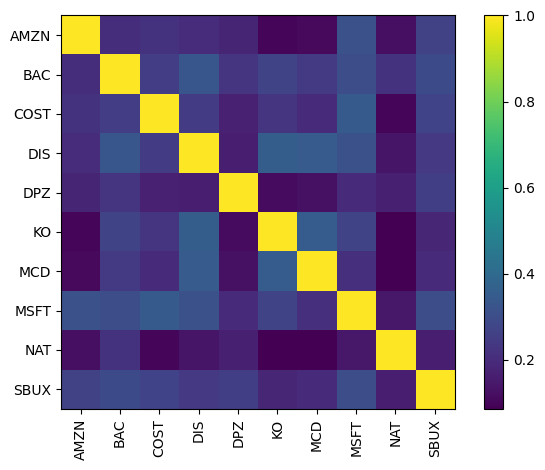

In [83]:
plotting.plot_covariance(S, plot_correlation=True);

In [84]:
ohlc

Adj Close                                                 \
                  AMZN        BAC        COST         DIS         DPZ   
Date                                                                    
1962-01-02         NaN        NaN         NaN    0.058398         NaN   
1962-01-03         NaN        NaN         NaN    0.059182         NaN   
1962-01-04         NaN        NaN         NaN    0.059182         NaN   
1962-01-05         NaN        NaN         NaN    0.059378         NaN   
1962-01-08         NaN        NaN         NaN    0.059182         NaN   
...                ...        ...         ...         ...         ...   
2023-03-27   98.040001  28.490000  493.220001   95.620003  322.220001   
2023-03-28   97.239998  28.120001  486.769989   94.820000  324.230011   
2023-03-29  100.250000  28.670000  490.869995   96.870003  327.579987   
2023-03-30  102.000000  28.299999  491.480011   98.099998  327.649994   
2023-03-31  103.290001  28.600000  496.869995  100.129997  329.869995   

                                                                 ...  \
                   KO         MCD        MSFT   NAT        SBUX  ...   
Date                                                             ...   
1962-01-02   0.049286         NaN         NaN   NaN         NaN  ...   
1962-01-03   0.048188         NaN         NaN   NaN         NaN  ...   
1962-01-04   0.048554         NaN         NaN   NaN         NaN  ...   
1962-01-05   0.047456         NaN         NaN   NaN         NaN  ...   
1962-01-08   0.046968         NaN         NaN   NaN         NaN  ...   
...               ...         ...         ...   ...         ...  ...   
2023-03-27  61.349998  273.839996  276.380005  4.00   98.660004  ...   
2023-03-28  61.419998  275.850006  275.230011  3.90   98.720001  ...   
2023-03-29  61.860001  277.440002  280.510010  3.97  100.620003  ...   
2023-03-30  61.849998  277.790009  284.049988  3.94  101.320000  ...   
2023-03-31  62.029999  279.609985  288.299988  3.96  104.129997  ...   

                Volume                                                        \
                  AMZN          BAC       COST      DIS        DPZ        KO   
Date                                                                           
1962-01-02         NaN          NaN        NaN   841958        NaN    806400   
1962-01-03         NaN          NaN        NaN   801865        NaN   1574400   
1962-01-04         NaN          NaN        NaN   962238        NaN    844800   
1962-01-05         NaN          NaN        NaN   962238        NaN   1420800   
1962-01-08         NaN          NaN        NaN  1282984        NaN   2035200   
...                ...          ...        ...      ...        ...       ...   
2023-03-27  46721300.0  102469800.0  1452100.0  7487900  1338600.0  12777400   
2023-03-28  38720100.0   63416500.0  1407800.0  5426100   556500.0  10925700   
2023-03-29  49783300.0   62666400.0  1643000.0  5889100   809800.0   9441000   
2023-03-30  53633400.0   67427100.0  1545500.0  7669500   788400.0   9870700   
2023-03-31  56704300.0   56417400.0  2081300.0  8911100  1087000.0  14439400   

                                                         
                  MCD        MSFT        NAT       SBUX  
Date                                                     
1962-01-02        NaN         NaN        NaN        NaN  
1962-01-03        NaN         NaN        NaN        NaN  
1962-01-04        NaN         NaN        NaN        NaN  
1962-01-05        NaN         NaN        NaN        NaN  
1962-01-08        NaN         NaN        NaN        NaN  
...               ...         ...        ...        ...  
2023-03-27  2799100.0  26840200.0  2694500.0  6022200.0  
2023-03-28  2036000.0  21878600.0  2565200.0  4709800.0  
2023-03-29  2053400.0  25087000.0  3059500.0  4946600.0  
2023-03-30  1788800.0  25053400.0  2193700.0  4082600.0  
2023-03-31  2902100.0  32740300.0  2772400.0  6899300.0  

[15418 rows x 60 columns]

In [85]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

AMZN    0.153989
BAC     0.099083
COST    0.076925
DIS     0.092459
DPZ     0.047785
KO      0.064336
MCD     0.068175
MSFT    0.138535
NAT     0.050725
SBUX    0.078605
dtype: float64

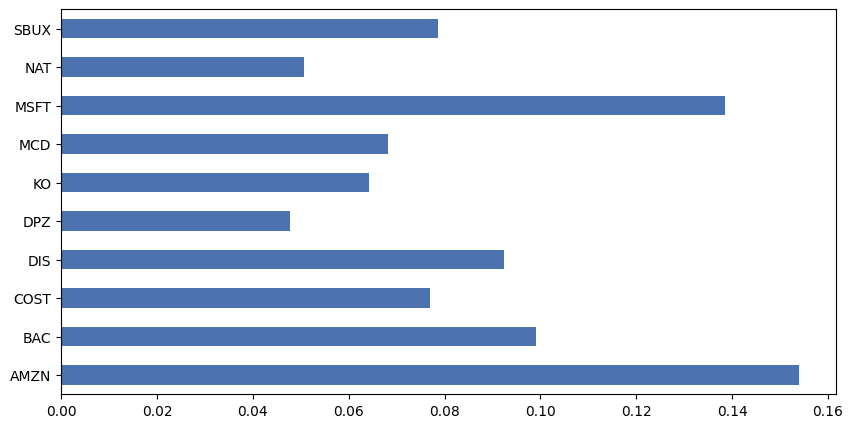

In [86]:
market_prior.plot.barh(figsize=(10,5));

In [87]:
# You don't have to provide views on all the assets
viewdict = {
    "AMZN": 0.10,
    "BAC": 0.30,
    "COST": 0.05,
    "DIS": 0.05,
    "DPZ": 0.20,
    "KO": -0.05,  # I think Coca-Cola will go down 5%
    "MCD": 0.15,
    "MSFT": 0.10,
    "NAT": 0.50,  # but low confidence, which will be reflected later
    "SBUX": 0.10
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [88]:
confidences = [
    0.6,
    0.4,
    0.2,
    0.5,
    0.7, # confident in dominos
    0.7, # confident KO will do poorly
    0.7, 
    0.5,
    0.1,
    0.4
]

In [89]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

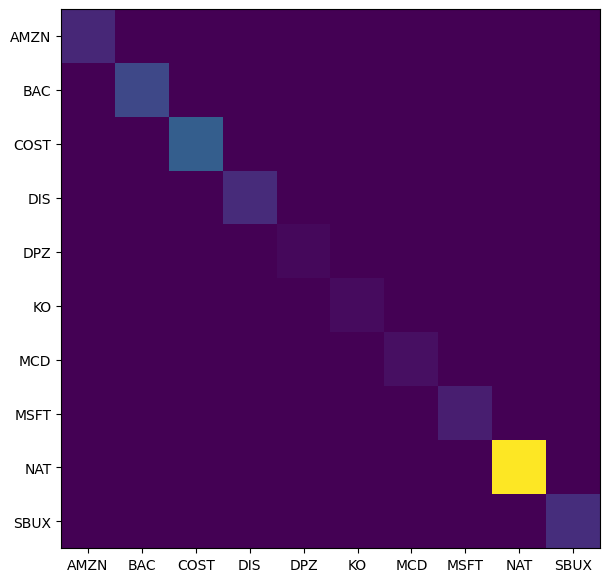

In [90]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(bl.omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [91]:
np.diag(bl.omega)

array([0.00461442, 0.00889596, 0.01216516, 0.00498349, 0.00085237,
       0.00114837, 0.00171482, 0.0034777 , 0.04090159, 0.00541687])

In [92]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3)
]

In [93]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225]


In [94]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [95]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

AMZN    0.137123
BAC     0.130428
COST    0.061689
DIS     0.071748
DPZ     0.103869
KO      0.008279
MCD     0.103933
MSFT    0.103791
NAT     0.061181
SBUX    0.082168
dtype: float64

In [96]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AMZN,0.153989,0.137123,0.10
BAC,0.099083,0.130428,0.30
COST,0.076925,0.061689,0.05
DIS,0.092459,0.071748,0.05
DPZ,0.047785,0.103869,0.20
KO,0.064336,0.008279,-0.05
MCD,0.068175,0.103933,0.15
MSFT,0.138535,0.103791,0.10
NAT,0.050725,0.061181,0.50
SBUX,0.078605,0.082168,0.10


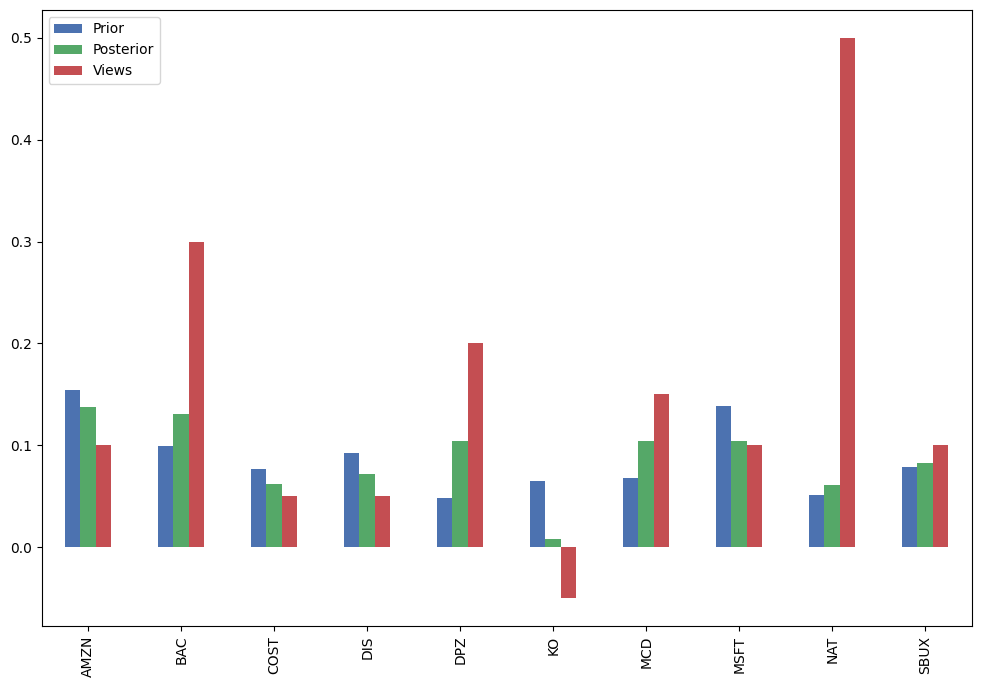

In [97]:
rets_df.plot.bar(figsize=(12,8));

In [98]:
from pypfopt import EfficientFrontier, objective_functions

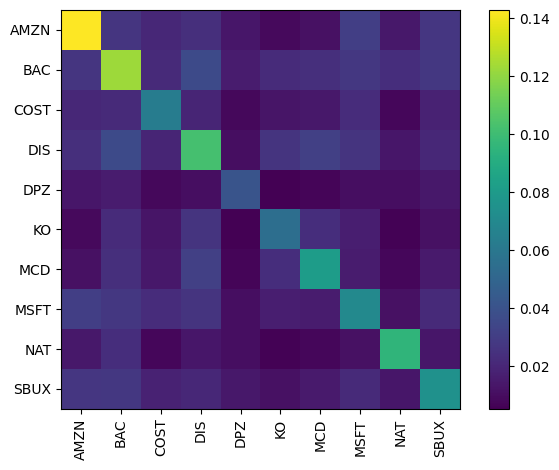

In [99]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

In [101]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/Users/afraaa/miniconda3/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AMZN', 0.17315),
             ('BAC', 0.16245),
             ('COST', 0.05682),
             ('DIS', 0.06595),
             ('DPZ', 0.13843),
             ('KO', 0.0),
             ('MCD', 0.13033),
             ('MSFT', 0.12643),
             ('NAT', 0.05762),
             ('SBUX', 0.08883)])

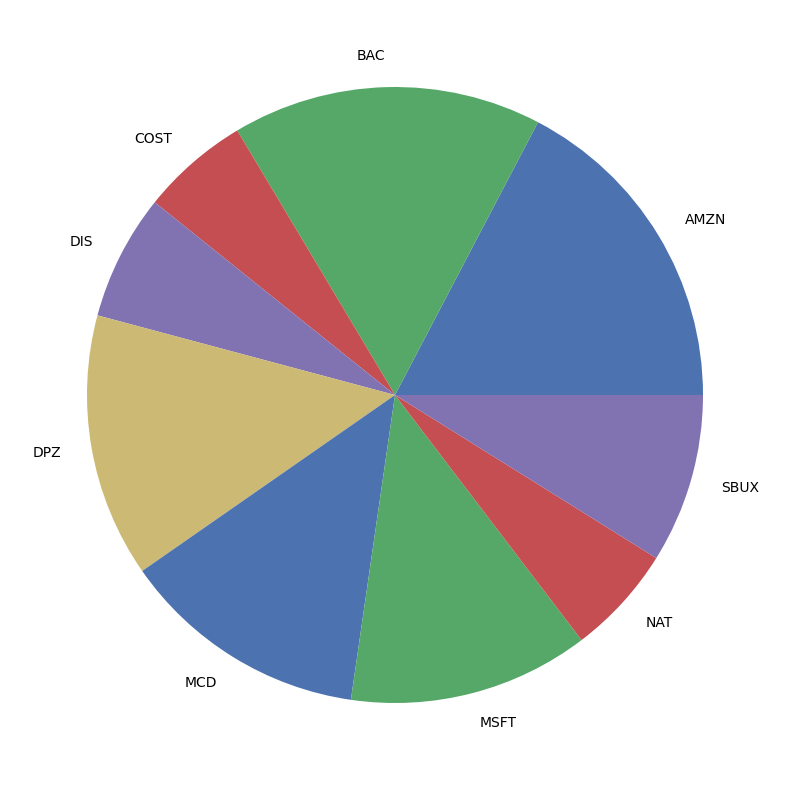

In [102]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [103]:
S_bl

,AMZN,BAC,COST,DIS,DPZ,KO,MCD,MSFT,NAT,SBUX
AMZN,0.142855,0.026562,0.020587,0.023911,0.013650,0.008450,0.011532,0.030873,0.014240,0.026890
BAC,0.026562,0.122710,0.021802,0.036245,0.015855,0.021989,0.023576,0.027400,0.023468,0.027432
COST,0.020587,0.021802,0.063057,0.019263,0.008422,0.012864,0.013969,0.022516,0.007721,0.018346
DIS,0.023911,0.036245,0.019263,0.102031,0.010429,0.026142,0.031247,0.026007,0.013492,0.020406
DPZ,0.013650,0.015855,0.008422,0.010429,0.040847,0.005222,0.007300,0.010367,0.010163,0.013940
KO,0.008450,0.021989,0.012864,0.026142,0.005222,0.054778,0.023319,0.016723,0.006097,0.011560
MCD,0.011532,0.023576,0.013969,0.031247,0.007300,0.023319,0.081482,0.015818,0.007413,0.014939
MSFT,0.030873,0.027400,0.022516,0.026007,0.010367,0.016723,0.015818,0.069907,0.011636,0.021517
NAT,0.014240,0.023468,0.007721,0.013492,0.010163,0.006097,0.007413,0.011636,0.095134,0.013489
SBUX,0.026890,0.027432,0.018346,0.020406,0.013940,0.011560,0.014939,0.021517,0.013489,0.074961


In [104]:
import RiskParity

In [105]:
RiskParity.risk_parity(S_bl,tickers)

{'MSFT': 0.07489638440449697,
 'AMZN': 0.08966184300060215,
 'NAT': 0.11927259379596063,
 'BAC': 0.09853921392831841,
 'DPZ': 0.13673758274818512,
 'DIS': 0.12652641548354496,
 'KO': 0.10211272916613191,
 'MCD': 0.12040634129371645,
 'COST': 0.08334261794019605,
 'SBUX': 0.11153741479929465}

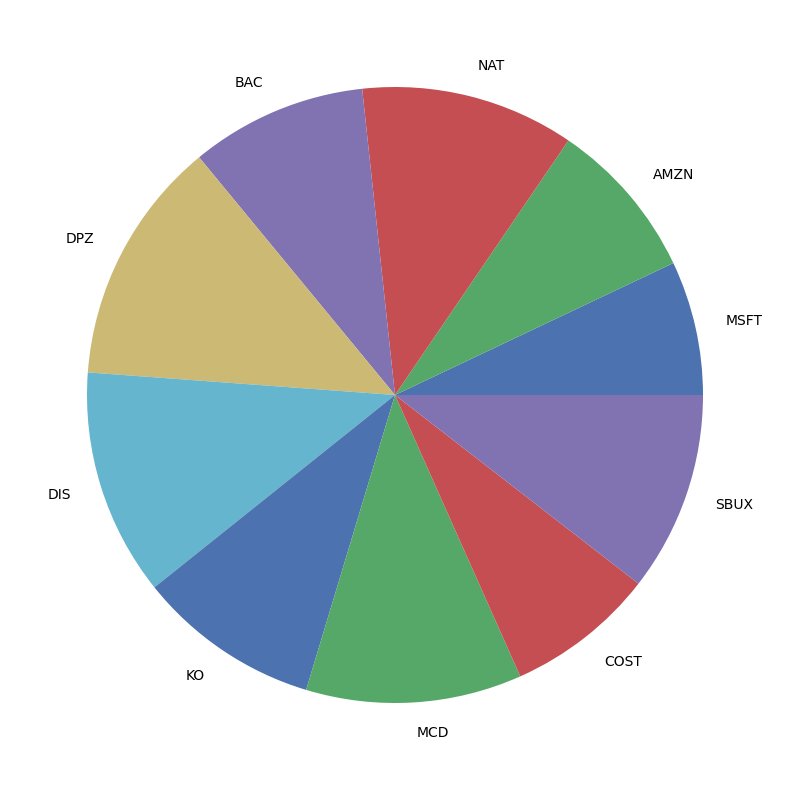

In [106]:
pd.Series(RiskParity.risk_parity(S_bl,tickers)).plot.pie(figsize=(10,10));

In [107]:
initial_weights = np.array([1 / n_assets] * n_assets)

In [108]:
n_assets = 10

In [109]:
initial_weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [110]:
[1 / n_assets] * n_assets

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [111]:
np.sqrt(np.diag(covariance_matrix)) * initial_weights

array([0.03779614, 0.03503006, 0.02511107, 0.03194222, 0.02021066,
       0.02340464, 0.02854513, 0.02643994, 0.03084374, 0.02737903])

In [112]:
covariance_matrix = S_bl

In [113]:
S_bl

,AMZN,BAC,COST,DIS,DPZ,KO,MCD,MSFT,NAT,SBUX
AMZN,0.142855,0.026562,0.020587,0.023911,0.013650,0.008450,0.011532,0.030873,0.014240,0.026890
BAC,0.026562,0.122710,0.021802,0.036245,0.015855,0.021989,0.023576,0.027400,0.023468,0.027432
COST,0.020587,0.021802,0.063057,0.019263,0.008422,0.012864,0.013969,0.022516,0.007721,0.018346
DIS,0.023911,0.036245,0.019263,0.102031,0.010429,0.026142,0.031247,0.026007,0.013492,0.020406
DPZ,0.013650,0.015855,0.008422,0.010429,0.040847,0.005222,0.007300,0.010367,0.010163,0.013940
KO,0.008450,0.021989,0.012864,0.026142,0.005222,0.054778,0.023319,0.016723,0.006097,0.011560
MCD,0.011532,0.023576,0.013969,0.031247,0.007300,0.023319,0.081482,0.015818,0.007413,0.014939
MSFT,0.030873,0.027400,0.022516,0.026007,0.010367,0.016723,0.015818,0.069907,0.011636,0.021517
NAT,0.014240,0.023468,0.007721,0.013492,0.010163,0.006097,0.007413,0.011636,0.095134,0.013489
SBUX,0.026890,0.027432,0.018346,0.020406,0.013940,0.011560,0.014939,0.021517,0.013489,0.074961


In [114]:
MRC = covariance_matrix @ initial_weights.T

In [115]:
MRC

AMZN    0.031955
BAC     0.034704
COST    0.020855
DIS     0.030917
DPZ     0.013619
KO      0.018715
MCD     0.023060
MSFT    0.025276
NAT     0.020285
SBUX    0.024348
dtype: float64

In [116]:
np.multiply(MRC,initial_weights.T)

AMZN    0.003195
BAC     0.003470
COST    0.002085
DIS     0.003092
DPZ     0.001362
KO      0.001871
MCD     0.002306
MSFT    0.002528
NAT     0.002029
SBUX    0.002435
dtype: float64